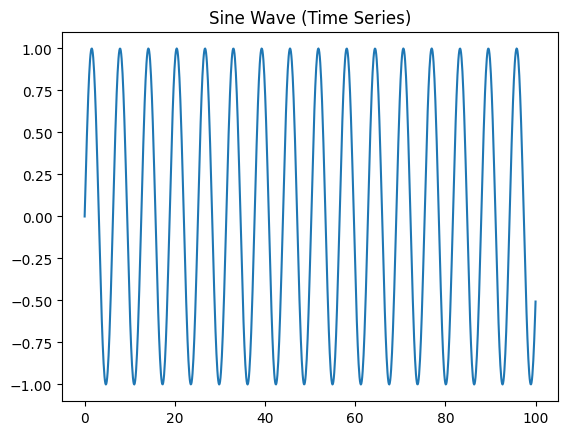

Epoch 1/10


C:\Users\visha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0278
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2240e-04
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8486e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7479e-05
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6852e-05
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9017e-05
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6580e-05
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2318e-05
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2243e-05
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5779e-06
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


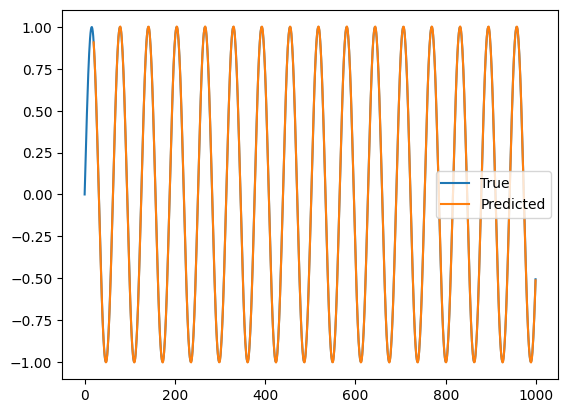

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. Generate synthetic time series data (sine wave)
x = np.linspace(0, 100, 1000)  # 1000 time points
y = np.sin(x)  # sine wave

# Plot data
plt.plot(x, y)
plt.title("Sine Wave (Time Series)")
plt.show()

# 2. Prepare dataset
time_steps = 20
X, Y = [], []
for i in range(len(y) - time_steps):
    X.append(y[i:i+time_steps])   # last 20 values
    Y.append(y[i+time_steps])     # next value
X, Y = np.array(X), np.array(Y)

# Reshape input to RNN format (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 3. Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)))
model.add(Dense(1))  # predict next value

model.compile(optimizer='adam', loss='mse')

# 4. Train model
history = model.fit(X, Y, epochs=10, batch_size=32)

# 5. Make predictions
pred = model.predict(X)

# Plot results
plt.plot(y, label='True')
plt.plot(range(time_steps, len(pred)+time_steps), pred, label='Predicted')
plt.legend()
plt.show()